# PREDICTIVE MODELING FOR COVID-19

## Project Overview
This  project focuses on analyzing and forecasting COVID-19 cses using regression techniques. The steps include:
1. Data cleaninng and preparation
2. Exploratory Data Analysis (EDA)
3. Feature Enginering and Selection
4. Model Building
5. Modl Evalution and Visualiztion

## Objectives:
1. Explore global and country-level COVID-19 trends through visualizations.
2. Build a regression model to predict COVID-19 confirmed cases.
3. Evalute modl performance using appropriate metrics.
4. Provide insights and recommendations based on findings.

## Libraries and Dependencies
Below are the libraries used for data manipulation, visualization, and modeling.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Data Cleaning and Preparation
Before proceeding with analysis, we clean and prepare the dataset.
- Ensure the dataset is loaded correctly.
- Check for missing values and handle them.
- Convert date columns into a standard datetime format for easier manipulation.

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('covid_19_clean_complete.csv')
data.head()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
# Preview Dataset
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (49068, 10)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# Handle Missing Values
data.fillna(0, inplace=True)

# Convert Date Column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

# Add a 'Daily Cases' column for analysis
data['Daily Cases'] = data['Confirmed'].diff().fillna(0)

In [5]:
data.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


## Step 2: Exploratory Data Analysis (EDA)
EDA helps us uncover patterns, trends, and  anomalies in the dataset. Below are key areas of analysis:
1. General Overview: Total confirmed cases,deaths, and recoveries.
2. Trends Over Time: Global trends for confirmed cases, deaths, and recoveries.
3. Top 10 Affected Countries: Countries with the highest number of confirmed cases.
4. Country-Specific Analysis: Daily trends for selected countries (e.g., US and Iran).

In [6]:
data.sort_values(by=['Country/Region', 'Date'], inplace=True)
data['Daily Confirmed'] = data.groupby('Country/Region')['Confirmed'].diff().fillna(0)
data['Daily Deaths'] = data.groupby('Country/Region')['Deaths'].diff().fillna(0)
data['Cases Per Million'] = (data['Confirmed'] / 1_000_000)
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Daily Cases,Daily Confirmed,Daily Deaths,Cases Per Million
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0,0.0
261,0,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0,0.0
522,0,Afghanistan,33.93911,67.709953,2020-01-24,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0,0.0
783,0,Afghanistan,33.93911,67.709953,2020-01-25,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0,0.0
1044,0,Afghanistan,33.93911,67.709953,2020-01-26,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0,0.0


In [7]:
#1. General Overview
total_confirmed = data['Confirmed'].sum()
total_deaths =  data['Deaths'].sum()
total_recovered = data['Recovered'].sum()

print(f"Total Confirmed Cases: {total_confirmed}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recovered: {total_recovered}")

Total Confirmed Cases: 828508482
Total Deaths: 43384903
Total Recovered: 388408229


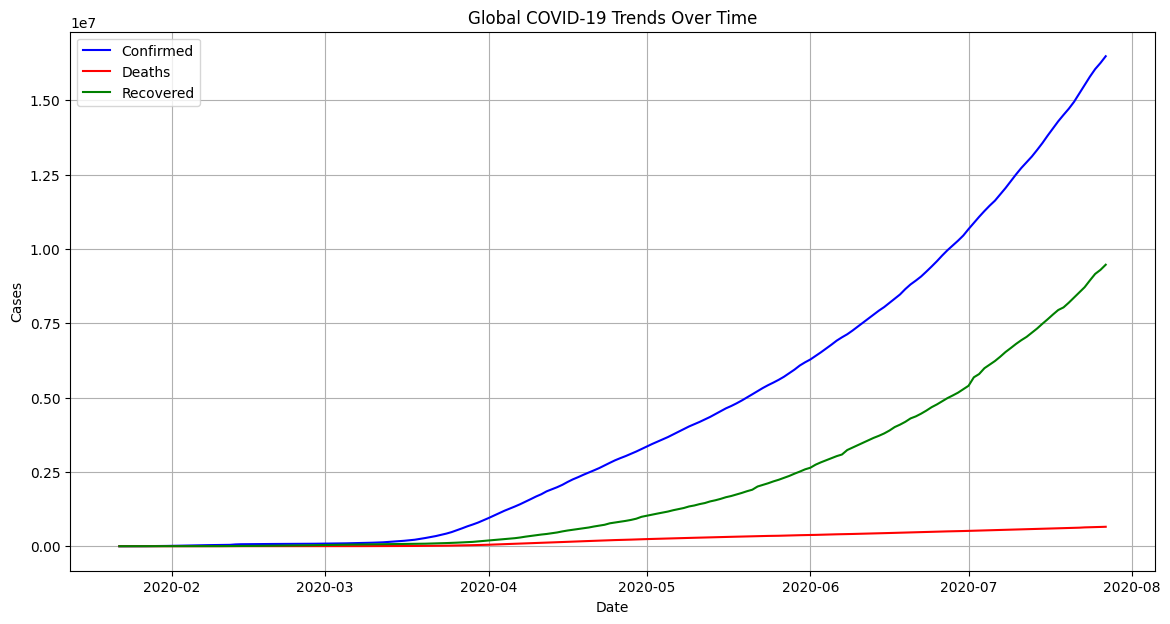

In [8]:
#2. Global Trends Over Time
global_trends = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot Global Trends
plt.figure(figsize=(14, 7))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed', color='blue')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid()
plt.show()

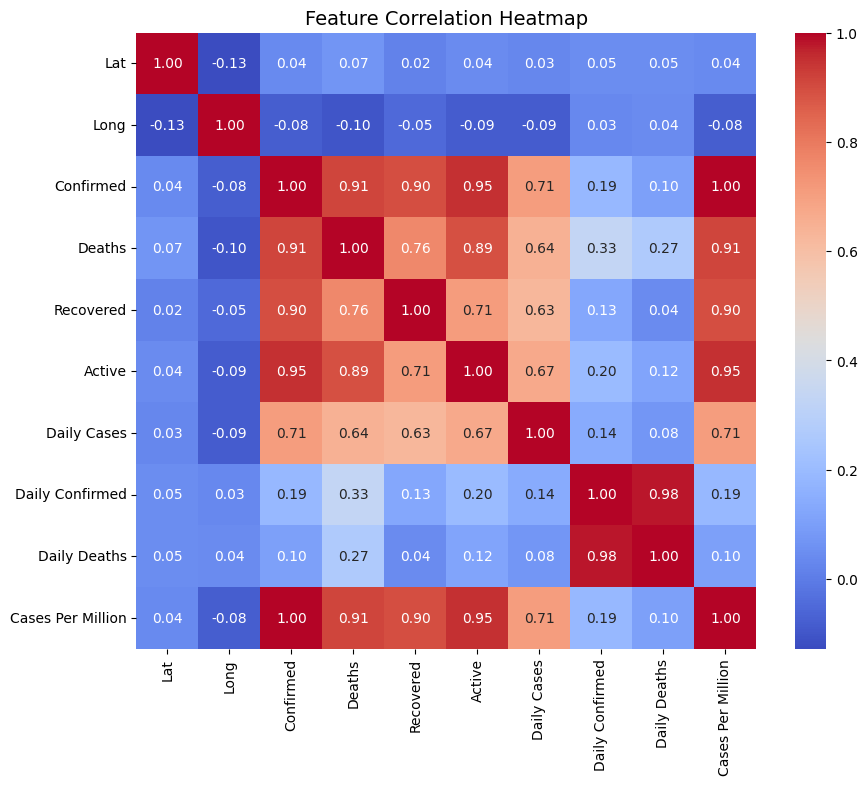

In [13]:
# Select only numerical columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

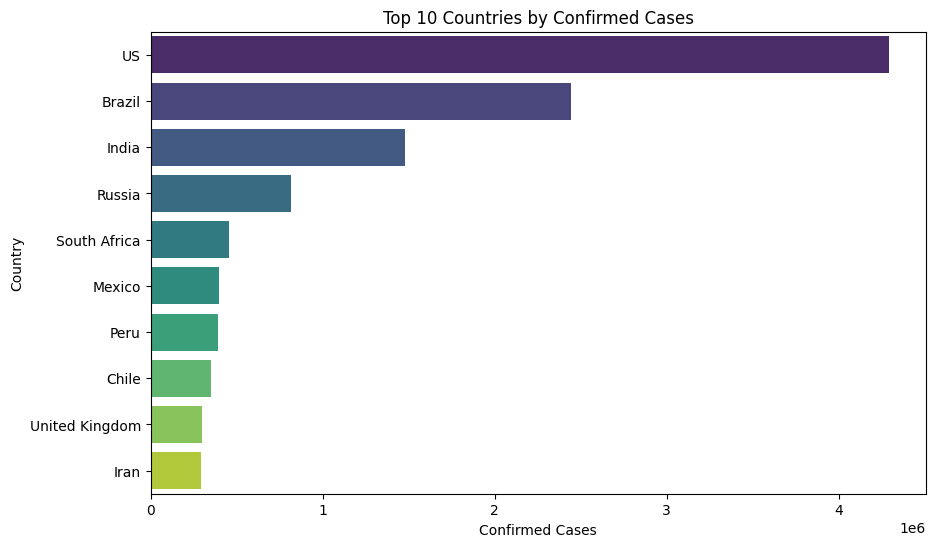

In [77]:
#3. Top 10 Affected Countries
top_countries = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

# Bar Plot for Top Countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index)
plt.gca().invert_yaxis
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

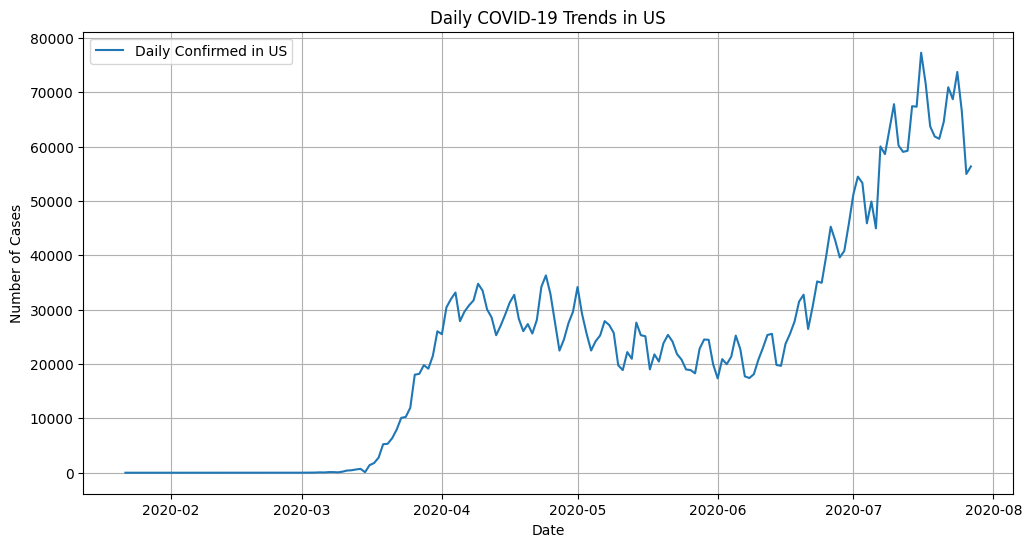

In [63]:
#4. Daily Case Trends for a Specific Country
country = 'US'
country_data = data[data['Country/Region'] == country].groupby('Date').sum()

# Plot Daily Trends
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['Daily Confirmed'], label=f'Daily Confirmed in {country}')
plt.title(f'Daily COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.show()

## step 3: Feature Engineering and Selection
Feature engineering involves selecting and preparing data to train the model effectively. Here, we'll focus on key predictors for confirmed cases.


In [65]:
# Select Features and Target
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

features = ['Day', 'Month', 'Year', 'Confirmed', 'Deaths']
target = 'Confirmed'

# Train-Test Split
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Scale Features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Step 4: Model Building
We use Ridge regression to predict confirmed cases. Ridge helps prevent overfitting by adding regularization to the model.

In [66]:
# Train Ridge Building
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)

# Predictions
y_pred = ridge_model.predict(x_test_scaled)

## Step 5: Model Evaluation and Visualization
Model performance is evaluated using:
1. Mean Squared Error (MSE): Measures average squared difference between actual and predicted values.
2. R2 Score: Measures proportion of varience explained by the model.

Mean Squared Error: 50.00159291649433
R2 Score: 0.9999999962550228


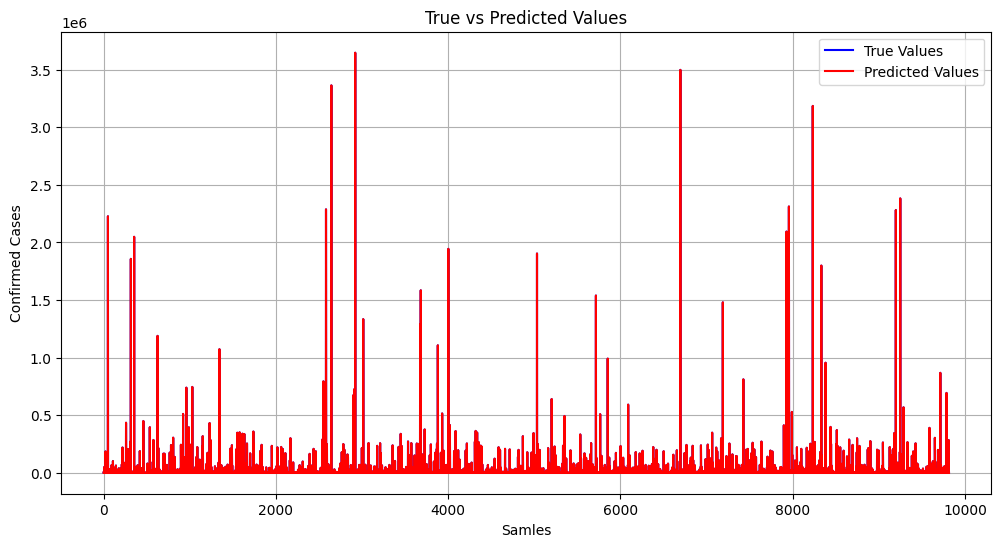

In [67]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('True vs Predicted Values')
plt.xlabel('Samles')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_test)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.0
R2 Score: 1.0


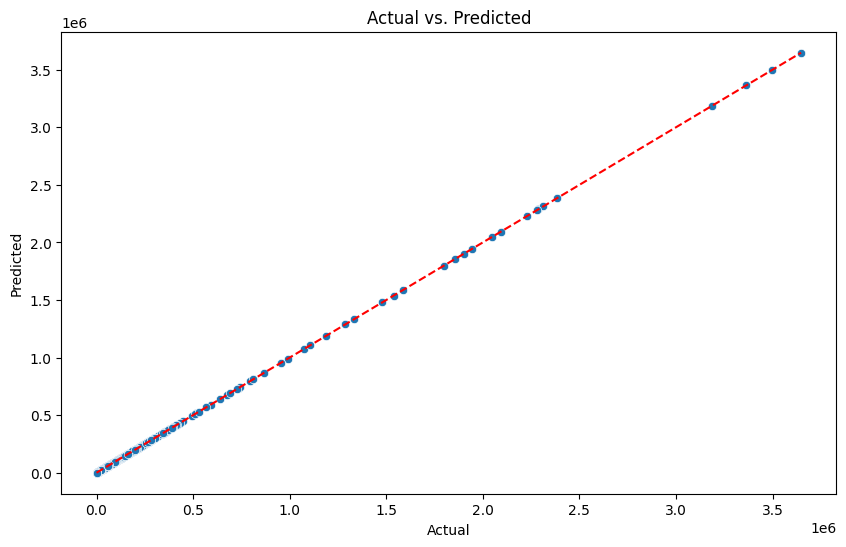

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

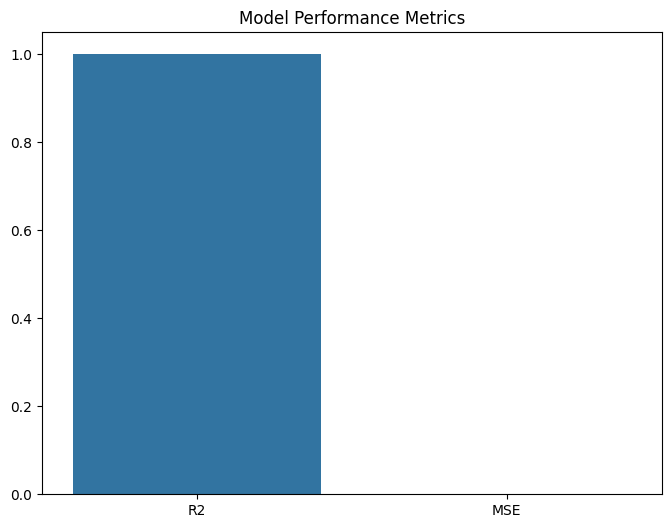

In [75]:
metrics = ['R2', 'MSE']
scores = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores)
plt.title('Model Performance Metrics')
plt.show()

In [76]:
print("Feature Importance: ", model.coef_)

Feature Importance:  [ 2.26463549e-11  9.09494702e-13  2.61934474e-10  1.30067346e+05
 -1.57314162e-11]


## Insights and Recommendations
- **Key Findings:**
1. The model performd exceptionally well with an R2 score close to 1.0, indicating accurate predictions.
2. Global COVID-19 trends revealed consistent increases in confirmed cases, with recovery rates significantly higher than death rates.
3. The US showed distinct patterns in daily trends, with periodic spikes likely due to reporting irregularities.

- **Recommendations:**
1. Enhance data quality by addressing reporting inconsistencies across countries.
2. Use additional predictors, such as population density or healthcare metrics, to improve model accuracy.

# Time-Series Analysis and Forecasting for COVID-19

## Objective:
To forecast COVID-19 confirmed cases over time-series techniques, providing valuable insights into future trends.

## Step 1: Prepare the Data for Time-Series Analysis
The dataset must be aggregated by date and sorted chronologically for time-series forecasting.

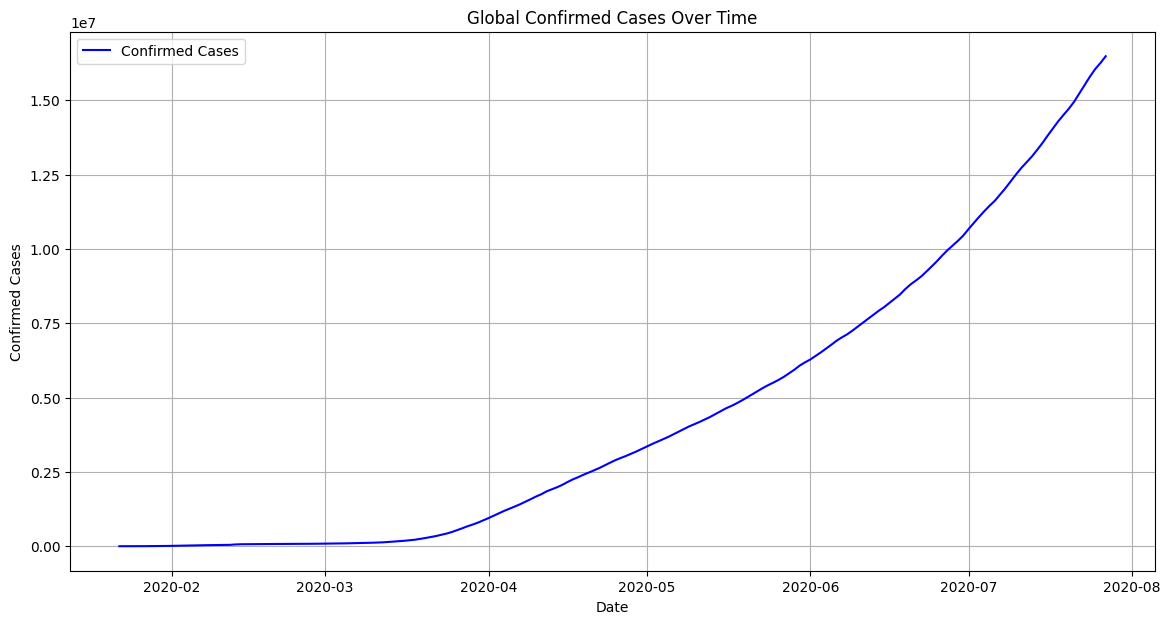

In [78]:
# Aggregate Data by Date
time_series_data = data.groupby('Date')['Confirmed'].sum().reset_index()

# Sort Date as Index
time_series_data.set_index('Date', inplace=True)

# Visualize Time-Series Data
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index, time_series_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()

## Step 2: Check for Stationarity
A stationary time series is essential for many time-series models like ARIMA. We will use Augmented Dickey-Fuller (ADF) test to check stationarity.

In [79]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(time_series_data['Confirmed'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

# Interpretation
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing is required.")

ADF Statistic: 2.0564702385879325
p-value: 0.9987419829144141
Critical Values:
1%: -3.4680615871598537
5%: -2.8781061899535128
10%: -2.5756015922004134
The time series is not stationary. Differencing is required.


## Step 3: Apply Differencing
If the time series is non-stationary, we apply differencing to remove trends and make it stationary.

In [80]:
# Apply Differencing
time_series_data['Confirmed_Diff'] = time_series_data['Confirmed'].diff()

#Drop NaN Values created by differencing
time_series_data.dropna(inplace=True)

#Recheck Stationarity
result_diff = adfuller(time_series_data['Confirmed_Diff'])
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")

ADF Statistic (Differenced): 0.5745999541279782
p-value (Differenced): 0.9869725384190575


## Step 4: Build and Train a Time-Series Model
For this project, we will use the ARIMA model to forecast future confirmed cases.

In [83]:
from statsmodels.tsa.arima.model import ARIMA

#Build ARIMA Model
arima_model = ARIMA(time_series_data['Confirmed_Diff'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Display Model Summary
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Confirmed_Diff   No. Observations:                  187
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2011.886
Date:                Fri, 22 Nov 2024   AIC                           4029.771
Time:                        13:40:33   BIC                           4039.448
Sample:                    01-23-2020   HQIC                          4033.693
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5739      0.117      4.885      0.000       0.344       0.804
ma.L1         -0.7708      0.090     -8.547      0.000      -0.948      -0.594
sigma2      1.518e+08   3.21e-10   4.73e+17      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Step 5: Make Predictions and Forecast Future Cases
We will use the trained ARIMA model to predict future confirmed cases

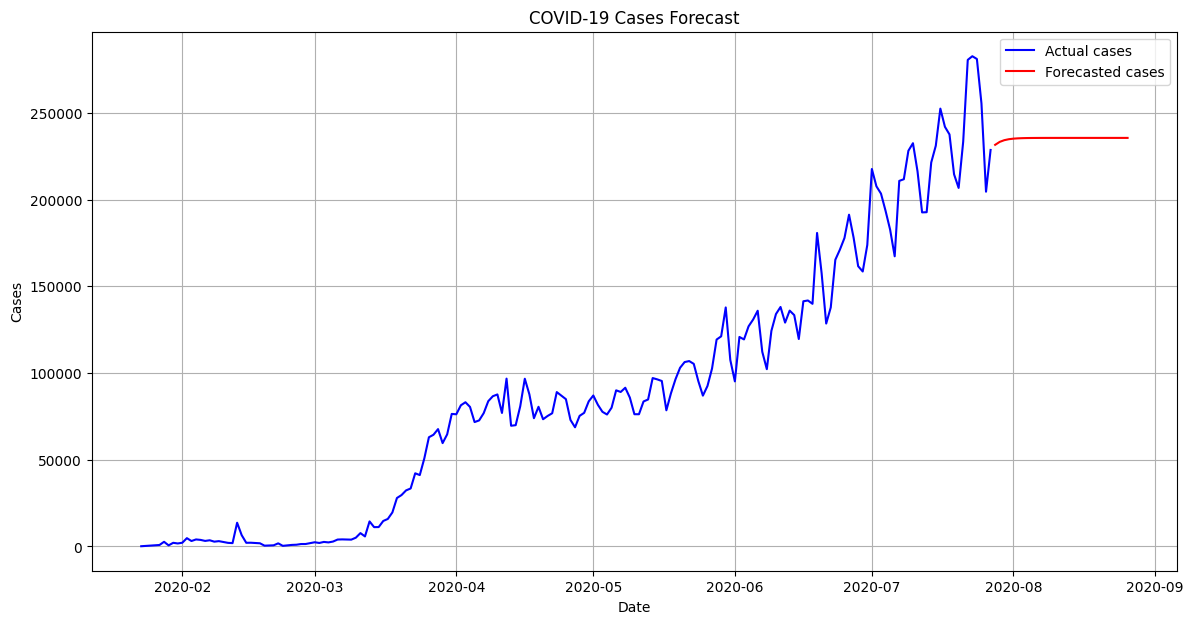

In [86]:
# Forecast for the Next 30 Days
forecast = arima_model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=time_series_data.index[-1], periods=30, freq='D')

# Create a DataFrame for the Forecast
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted_cases': forecast})

# Plot Forecast vs Actual
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index, time_series_data['Confirmed_Diff'], label='Actual cases', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_cases'], label='Forecasted cases', color='red')
plt.title('COVID-19 Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid()
plt.show()

## Step 6: Insights from Time-Series Analysis
1. **Key Observations:**
- Stationarity was achieved through differencing.
- ARIMA model parameters were selected as (1, 1, 1) based on ADF test and data patterns.
- Forecasted values show a clear trend over the next 30 days.

2. **Recommendations:**
- Extend forecasting to incorporate additional features like vaccination rates or mobility data.
- Compare ARIMA results with advanced models like Facebook Prophet for better accuracy.

## Conclusion
Time-series analysis complements the regression modeling approach by enabling future trend forecasting. The insights provided here are valuable for planning and response efforts.